In [22]:
import pandas as pd

housing_data_path = 'C:/Users/grees/OneDrive/SEM 3/AIT 582/Housing Sales Data.csv'
crime_data_path = 'C:/Users/grees/OneDrive/SEM 3/AIT 582/Crime_interpolated_data.csv'

real_estate = pd.read_csv(housing_data_path, low_memory=False)
crime_data = pd.read_csv(crime_data_path)

# Pivot/aggregate) crime data by Town and Crime Type
crime_summary = crime_data.pivot_table(
    index='Town',
    columns='Crime Type',
    values='Value',
    aggfunc='sum'  
).reset_index()

print("Crime Summary (Aggregated):")
print(crime_summary.head())

#  Reduce real estate data to necessary columns
real_estate = real_estate[['Town', 'Sale Amount', 'Assessed value', 'Property Type']]

#  merged real estate data and aggregated crime data
data_merge = pd.merge(real_estate, crime_summary, on='Town', how='left')

# Fill missing crime values with 0
merged_data = data_merge.fillna(0)

#  Preview the result
print("Merged Data Shape:", merged_data.shape)
print(merged_data.head())


Crime Summary (Aggregated):
Crime Type         Town  Aggravated Assault  Arson  Burglary   Larceny  \
0               Andover               386.4  775.2   27126.0   19380.0   
1               Ansonia              6094.8  880.8   29658.0  162860.4   
2               Ashford              4060.8    0.0   23214.0   21754.8   
3                  Avon               589.2  252.0   13441.2   91815.6   
4           Barkhamsted               674.4    0.0   18273.6   26721.6   

Crime Type  Motor Vehicle Theft  Murder    Rape  Robbery  Total Crime  \
0                        2709.6   386.4  1160.4   1550.4      52701.6   
1                       25478.4   147.6  2496.0   8224.8     234960.0   
2                        6975.6     0.0   868.8    872.4      57748.8   
3                        3694.8     0.0   420.0    840.0     110802.0   
4                        4737.6     0.0  1015.2    338.4      51758.4   

Crime Type  Total Property Crime  Total Violent Crime  
0                        49216.8

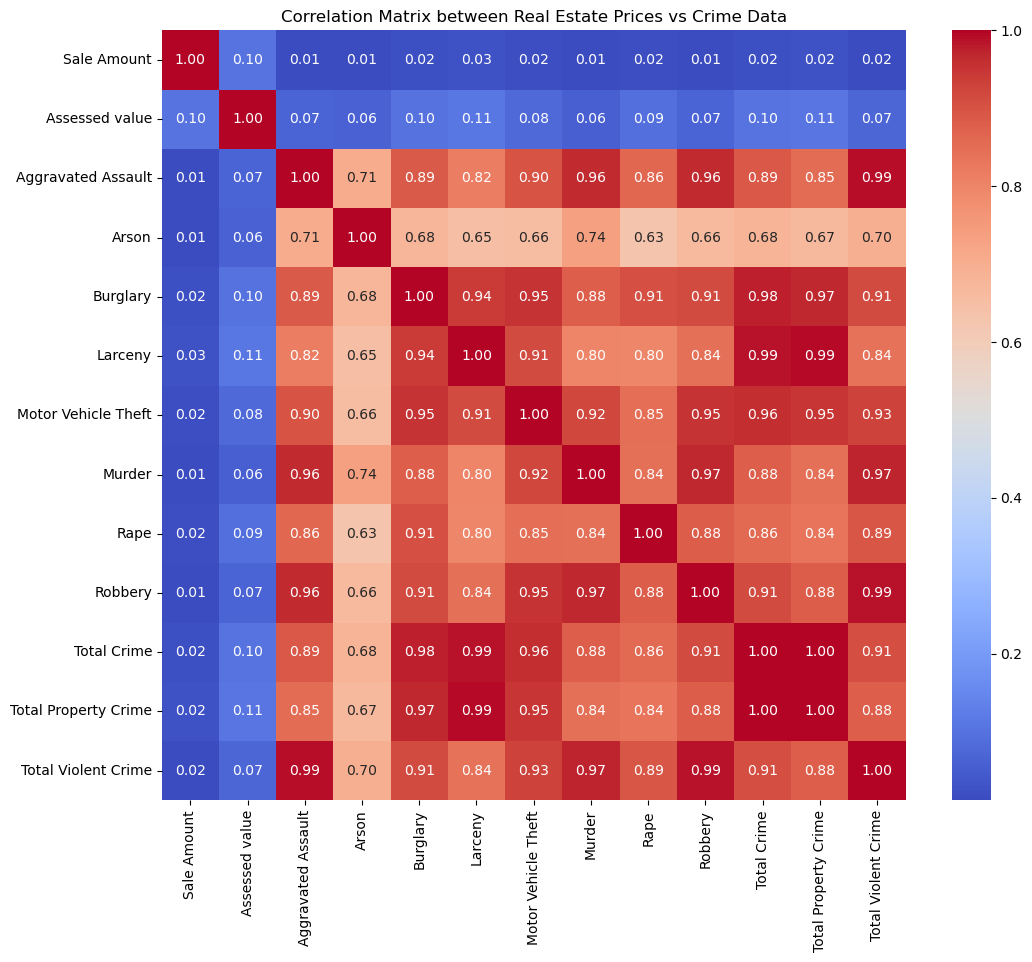

In [29]:
## Exploratory Data Analysis (EDA) – Correlation Check
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(figsize=(12, 10))

sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axis)

axis.set_title('Correlation Matrix between Real Estate Prices vs Crime Data')

plt.show()



R² Score (Log Transformed Target): 0.9976895212699795
MSE (Log Transformed Target): 0.05722732720622604


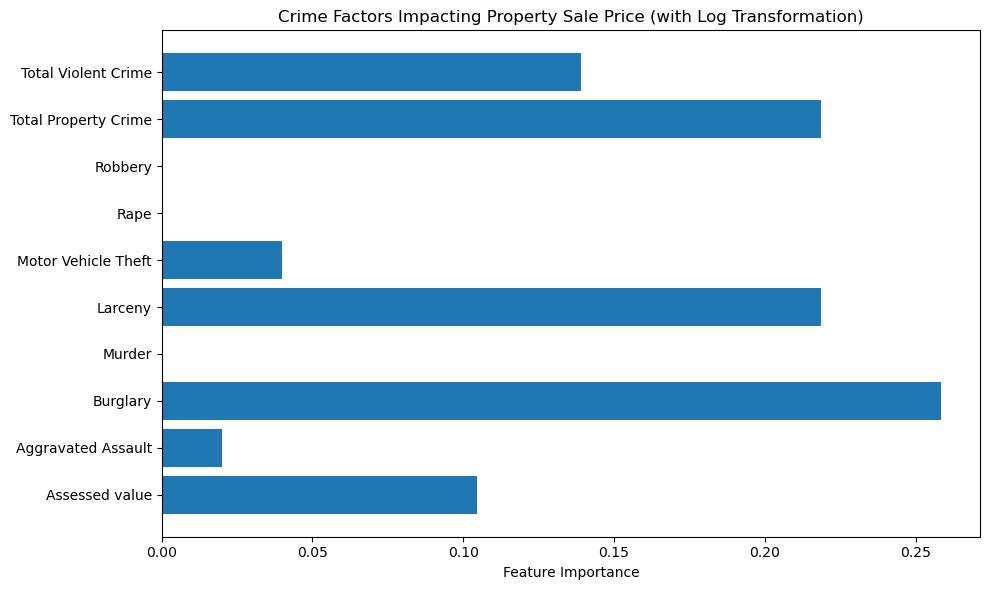

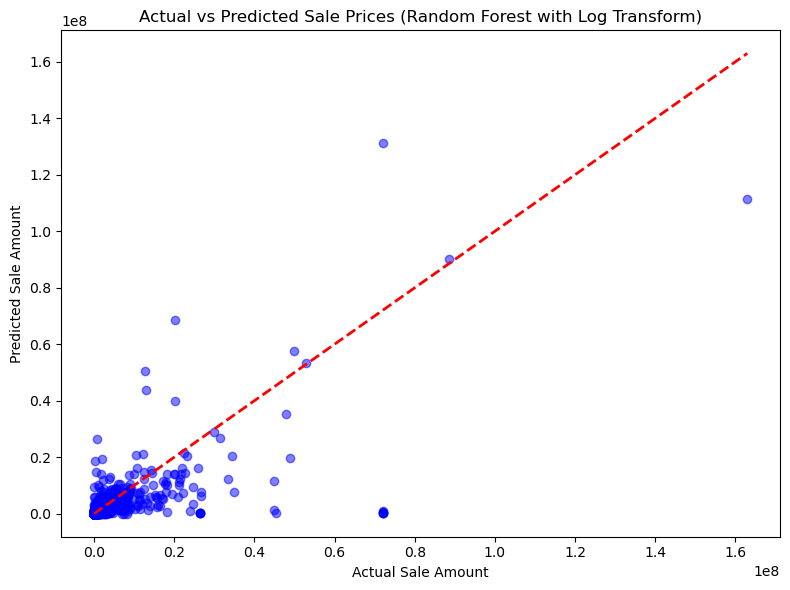

In [9]:
#  Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#  Define Features and Target (Crime Analysis Only)
features = merged_data[['Assessed value', 
                        'Aggravated Assault', 'Burglary', 'Murder', 
                        'Larceny', 'Motor Vehicle Theft', 'Rape', 
                        'Robbery', 'Total Property Crime', 'Total Violent Crime']]

#  Log transformation on target to handle skewness
target = np.log1p(merged_data['Sale Amount'])  

#  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=1)

#  Model Training
train_model = RandomForestRegressor(random_state=1, n_estimators=50, max_features='sqrt', n_jobs=-1)
train_model.fit(X_train, y_train)

# Predictions
y_pred = train_model.predict(X_test)

#  Evaluation
print("R² Score (Log Transformed Target):", r2_score(y_test, y_pred))
print("MSE (Log Transformed Target):", mean_squared_error(y_test, y_pred))

#  Feature Importance Plot
importances = train_model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Crime Factors Impacting Property Sale Price (with Log Transformation)')
plt.tight_layout()
plt.show()

#  Residual Plot 
y_test_actual = np.expm1(y_test)       
y_pred_actual = np.expm1(y_pred)        

plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5, color='blue')
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Amount')
plt.ylabel('Predicted Sale Amount')
plt.title('Actual vs Predicted Sale Prices (Random Forest with Log Transform)')
plt.tight_layout()
plt.show()


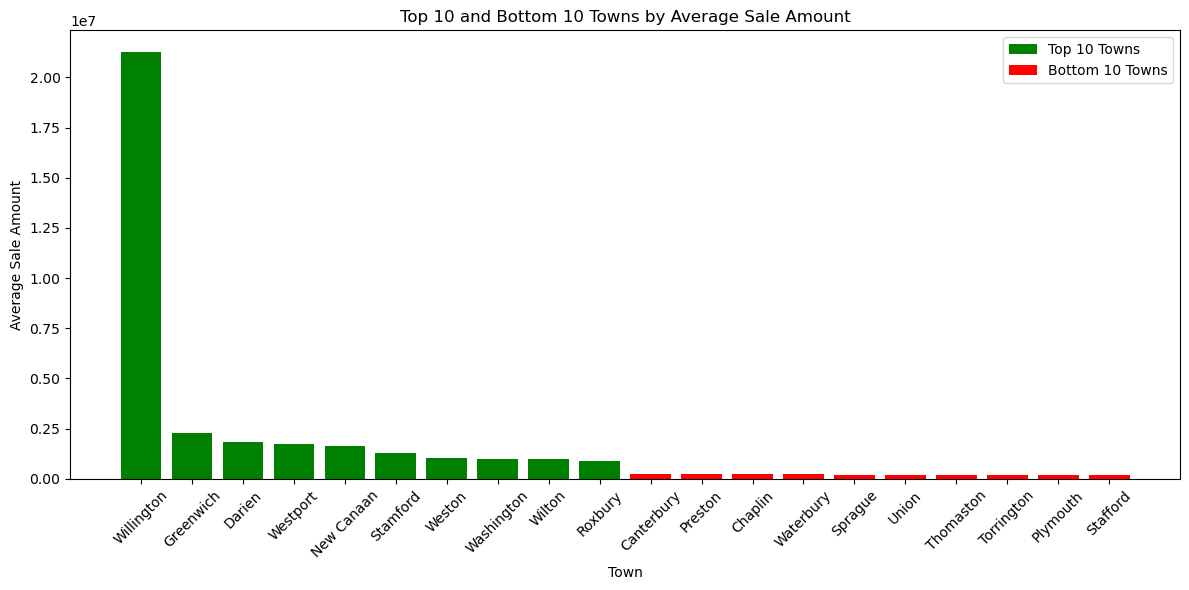

In [13]:
#1
# Group by Town and calculate average Sale Amount
# Filter out any rows where 'Town' is not a string
avg_sale_by_town = avg_sale_by_town[avg_sale_by_town['Town'].apply(lambda x: isinstance(x, str))]


# Top 10 and Bottom 10 Towns Visualization
# Plot after filtering
plt.figure(figsize=(12, 6))
plt.bar(avg_sale_by_town.head(10)['Town'], avg_sale_by_town.head(10)['Sale Amount'], color='green', label='Top 10 Towns')
plt.bar(avg_sale_by_town.tail(10)['Town'], avg_sale_by_town.tail(10)['Sale Amount'], color='red', label='Bottom 10 Towns')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.title('Top 10 and Bottom 10 Towns by Average Sale Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



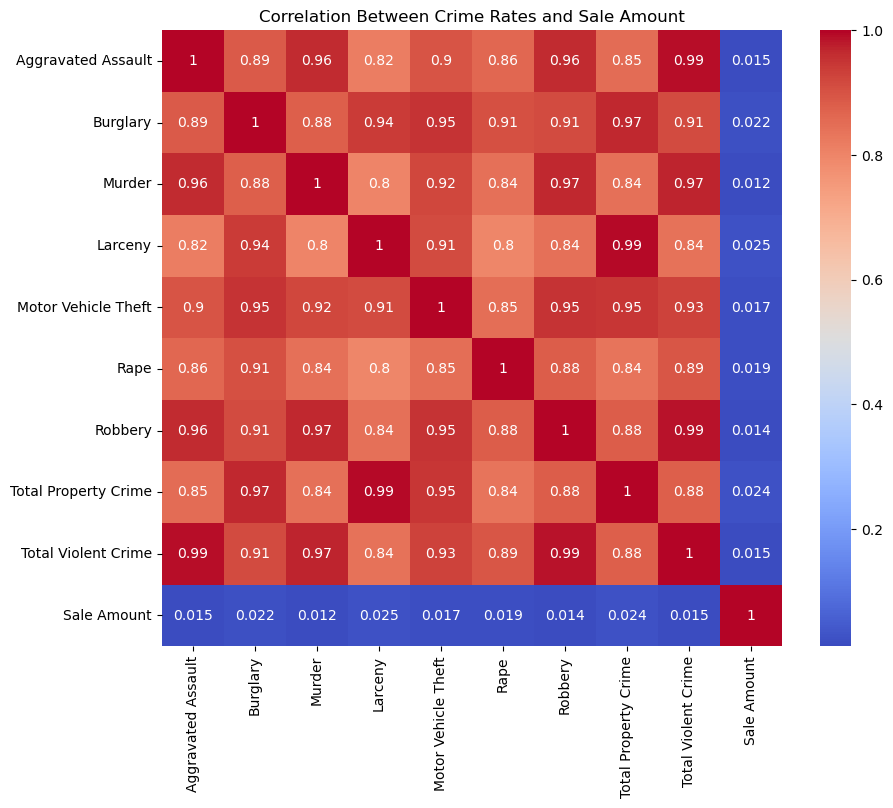

In [14]:
#2 
# Correlation between crime rates and sale amount
crime_columns = ['Aggravated Assault', 'Burglary', 'Murder', 
                 'Larceny', 'Motor Vehicle Theft', 'Rape', 
                 'Robbery', 'Total Property Crime', 'Total Violent Crime']

correlation_matrix = merged_data[crime_columns + ['Sale Amount']].corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Crime Rates and Sale Amount')
plt.show()


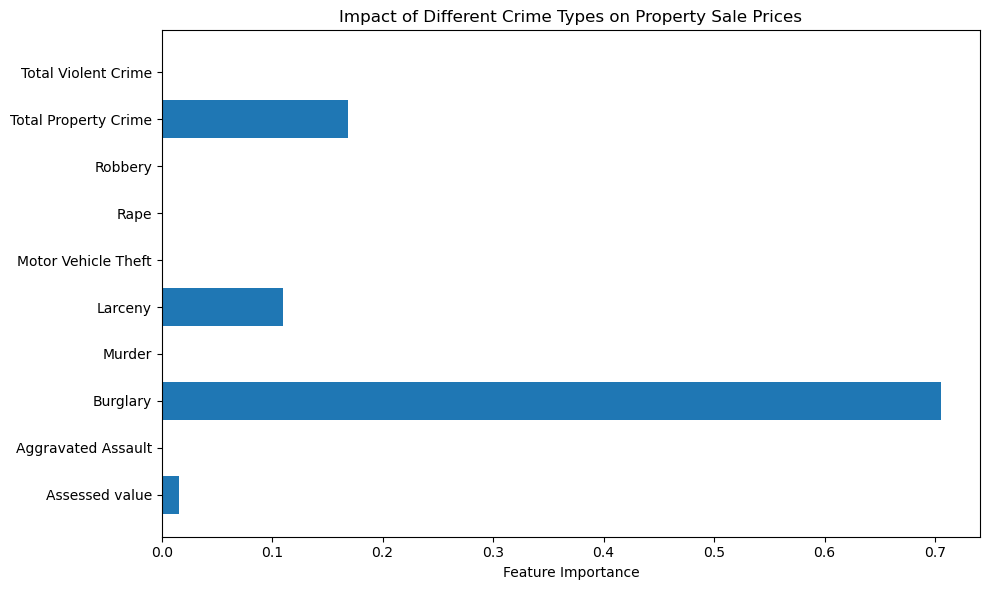

In [17]:
#3
# Feature Importance using Random Forest Regressor (Crime Only)
features = merged_data[['Assessed value'] + crime_columns]
target = np.log1p(merged_data['Sale Amount'])

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Impact of Different Crime Types on Property Sale Prices')
plt.tight_layout()
plt.show()


Available Columns: ['Town', 'Sale Amount', 'Assessed value', 'Property Type', 'Aggravated Assault', 'Arson', 'Burglary', 'Larceny', 'Motor Vehicle Theft', 'Murder', 'Rape', 'Robbery', 'Total Crime', 'Total Property Crime', 'Total Violent Crime']


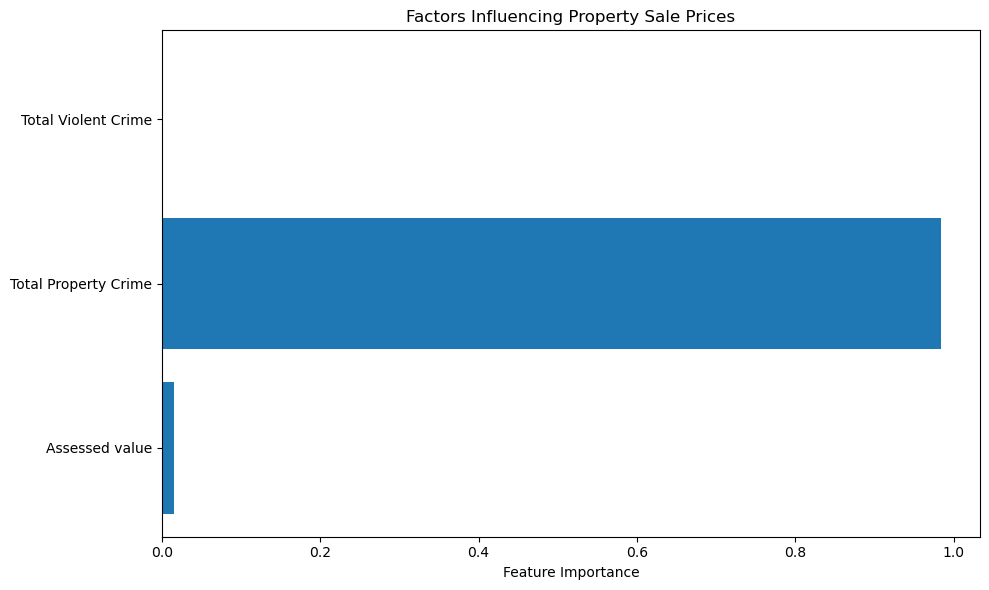

R² Score: 0.998
Root Mean Squared Error (RMSE): 0.224


In [25]:
#4

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Clean column names (remove extra spaces just in case)
merged_data.columns = merged_data.columns.str.strip()

# Confirm your column names
print("Available Columns:", merged_data.columns.tolist())

#  Use available columns from your dataset!
socio_features = merged_data[['Assessed value', 
                              'Total Property Crime', 
                              'Total Violent Crime']]

# Target variable (log transform to handle skewness)
target = np.log1p(merged_data['Sale Amount'])

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(socio_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = socio_features.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Factors Influencing Property Sale Prices')
plt.tight_layout()
plt.show()

# Model Evaluation
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
